In [1]:
##Testing out Linear Regression for Award and MaxPrice
##Prediction of 4 Star cost if existed
##Plot of variables with slope line

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('michelin_my_maps.csv')
df.head(1)

,Name,Address,Location,MinPrice,MaxPrice,Currency,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,FacilitiesAndServices
0,Les Amis,"Shaw Centre, #01-16, 1 Scotts Road, 228208, Si...",Singapore,225,460,SGD,French,103.83204,1.30626,6.567332e+09,https://guide.michelin.com/en/singapore-region...,https://www.lesamis.com.sg/,3 MICHELIN Stars,"Air conditioning,American Express credit card,..."


In [4]:
collist = sorted(df['Award'].unique().tolist())

In [5]:
## convert award to int
## convert MaxPrice to float w/o ,
## drop nas
## filter dataframe to USD currency
df['AwardNum'] = np.where(df['Award'] == '1 MICHELIN Star' ,1,
                 np.where(df['Award'] == '2 MICHELIN Stars',2,
                 np.where(df['Award'] == '3 MICHELIN Stars',3,
                                                            0)))

df["MaxPrice"] = df["MaxPrice"].str.replace(',', '').astype(float)
df = df.dropna()
df = df[df['Currency'] == 'USD']

In [6]:
x = np.array(df['AwardNum']).reshape((-1, 1))
z = np.array(df['AwardNum'])
y = np.array(df['MaxPrice'])

In [7]:
model = LinearRegression()

In [8]:
model.fit(x, y)

LinearRegression()

In [9]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7001871879310075
intercept: 52.13429187256763
slope: [108.36902008]


In [10]:
## prediction based on existing and 4 star options
x2 = np.array([0,1,2,3,4]).reshape((-1, 1))
y_new = model.predict(x2)
y_new

array([ 52.13429187, 160.50331195, 268.87233204, 377.24135212,
       485.6103722 ])

In [11]:
slope, intercept, r, p, std_err = stats.linregress(z, y)
def myfunc(x):
    return slope * x + intercept
mymodel = list(map(myfunc, x))

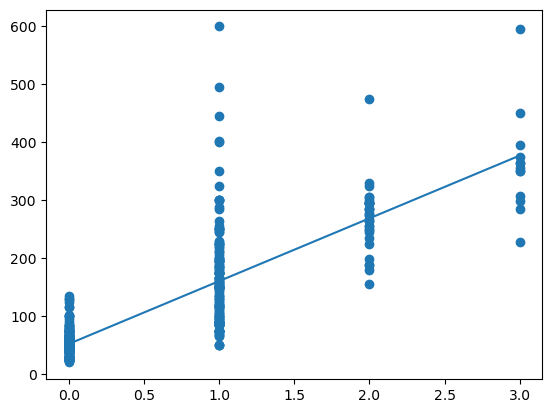

In [12]:
plt.scatter(z, y)
plt.plot(z, mymodel)
plt.show()